In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ttest_ind
!pip install pingouin
import pingouin as pg

In [ ]:
df = pd.read_csv("df_train.csv")
years = [i for i in range(1990, 2014)]
# encode CHGOFF (defuault) as 1 and PIF as 0
df['Default'] = df['LoanStatus'].apply(lambda x: 1 if x == "CHGOFF" else 0)

<ipython-input-2-1723771ca7fd>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_train.csv")


<ipython-input-3-f5e4ddf64448>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, j in df.groupby(['BusinessType']):
<ipython-input-3-f5e4ddf64448>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-3-f5e4ddf64448>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-3-f5e4ddf64448>:4:

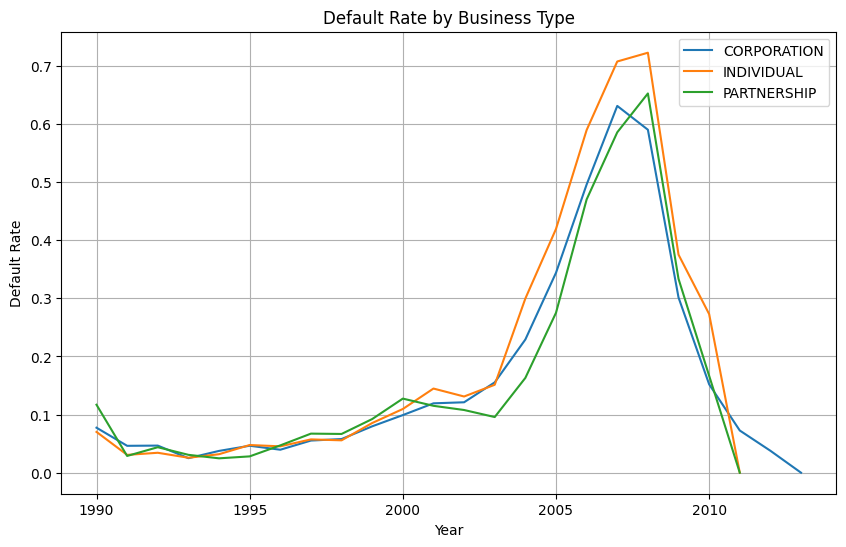

In [ ]:
plt.figure(figsize=(10,6))
for i, j in df.groupby(['BusinessType']):
  if str(i) != "MISSING":
    temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
    plt.plot(temp['ApprovalFiscalYear'], temp['Default'], label = str(i))
plt.grid()
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.title("Default Rate by Business Type")
plt.legend()
plt.show()

<ipython-input-4-26342c20c4af>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_100k = df.loc[df['GrossApproval'] <= 100000].groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-4-26342c20c4af>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_100_300k = df.loc[(df['GrossApproval'] > 100000) & (df['GrossApproval'] <= 300000)].groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-4-26342c20c4af>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or se

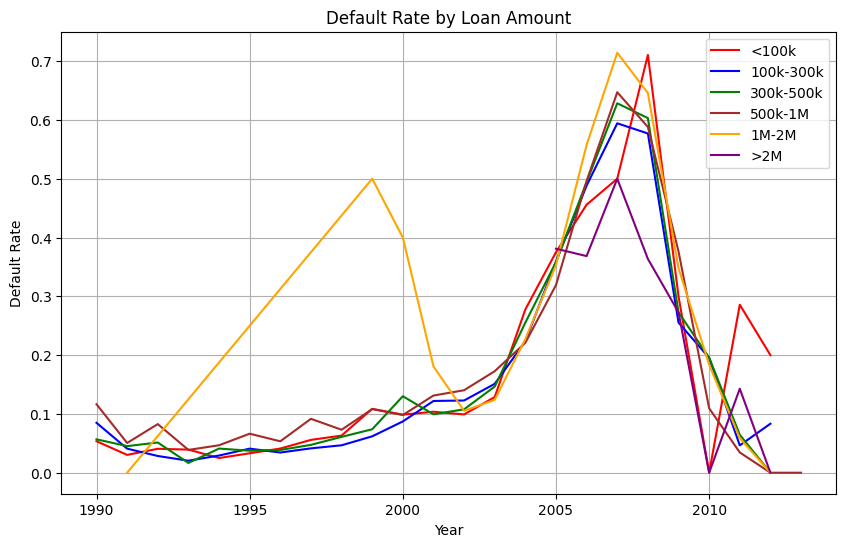

In [ ]:
# plot annual default rate by loan amount
df_100k = df.loc[df['GrossApproval'] <= 100000].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_100_300k = df.loc[(df['GrossApproval'] > 100000) & (df['GrossApproval'] <= 300000)].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_300_500k = df.loc[(df['GrossApproval'] > 300000) & (df['GrossApproval'] <= 500000)].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_500_1M = df.loc[(df['GrossApproval'] > 500000) & (df['GrossApproval'] <= 1000000)].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_1M_2M = df.loc[(df['GrossApproval'] > 1000000) & (df['GrossApproval'] <= 2000000)].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_2M = df.loc[df['GrossApproval'] > 2000000].groupby(['ApprovalFiscalYear']).mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(df_100k['ApprovalFiscalYear'], df_100k['Default'], label = "<100k", color = 'red')
plt.plot(df_100_300k['ApprovalFiscalYear'], df_100_300k['Default'], label = "100k-300k", color = 'blue')
plt.plot(df_300_500k['ApprovalFiscalYear'], df_300_500k['Default'], label = "300k-500k", color = 'green')
plt.plot(df_500_1M['ApprovalFiscalYear'], df_500_1M['Default'], label = "500k-1M", color = 'brown')
plt.plot(df_1M_2M['ApprovalFiscalYear'], df_1M_2M['Default'], label = "1M-2M", color = 'orange')
plt.plot(df_2M['ApprovalFiscalYear'], df_2M['Default'], label = ">2M", color = 'purple')
plt.grid()
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.title("Default Rate by Loan Amount")
plt.legend()
plt.show()

<ipython-input-5-eeb9d44f815c>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, j in df.groupby(['subpgmdesc']):
<ipython-input-5-eeb9d44f815c>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-5-eeb9d44f815c>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-5-eeb9d44f815c>:3: F

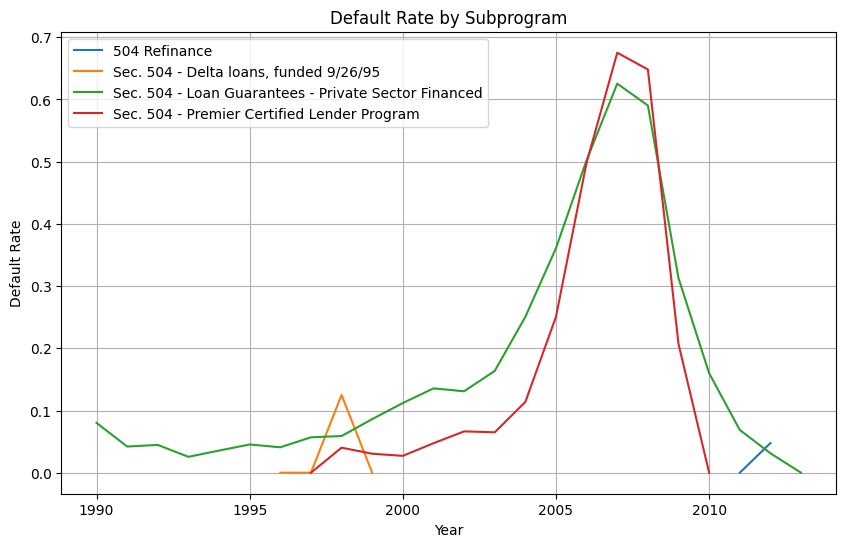

In [ ]:
plt.figure(figsize=(10,6))
for i, j in df.groupby(['subpgmdesc']):
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
  plt.plot(temp['ApprovalFiscalYear'], temp['Default'], label = str(i))
plt.grid()
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.title("Default Rate by Subprogram")
plt.legend()
plt.show()

<ipython-input-6-f519780eb187>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, j in df.groupby(['DeliveryMethod']):
<ipython-input-6-f519780eb187>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-6-f519780eb187>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-6-f519780eb187>:

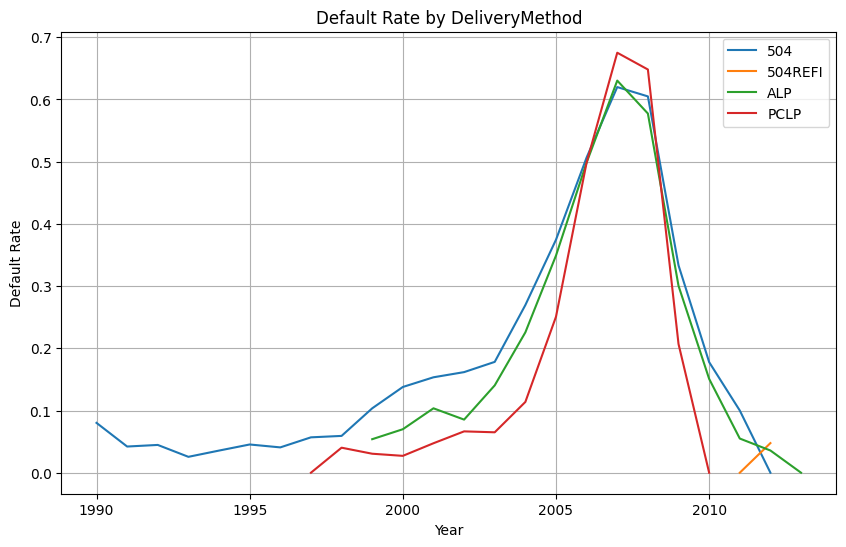

In [ ]:
plt.figure(figsize=(10,6))
for i, j in df.groupby(['DeliveryMethod']):
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
  plt.plot(temp['ApprovalFiscalYear'], temp['Default'], label = str(i))
plt.grid()
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.title("Default Rate by DeliveryMethod")
plt.legend()
plt.show()

<ipython-input-7-c414295b78c9>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, j in df.groupby(['NaicsCode']):
<ipython-input-7-c414295b78c9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-7-c414295b78c9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-7-c414295b78c9>:3: Fu

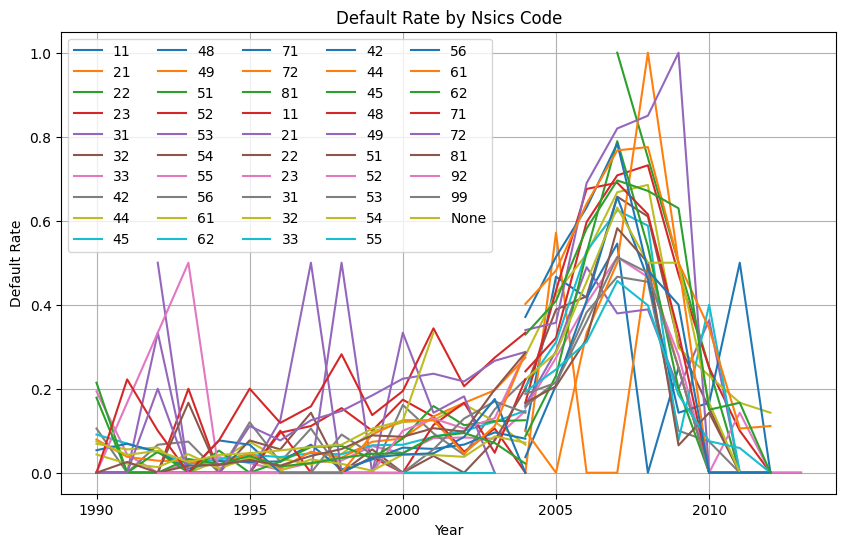

In [ ]:
plt.figure(figsize=(10,6))
for i, j in df.groupby(['NaicsCode']):
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
  plt.plot(temp['ApprovalFiscalYear'], temp['Default'], label = str(i))
plt.grid()
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.title("Default Rate by Nsics Code")
plt.legend(loc='upper left',ncol=5)
plt.show()

<ipython-input-8-60790039a918>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, j in df.groupby(['Is ThirdParty']):
<ipython-input-8-60790039a918>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-8-60790039a918>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()


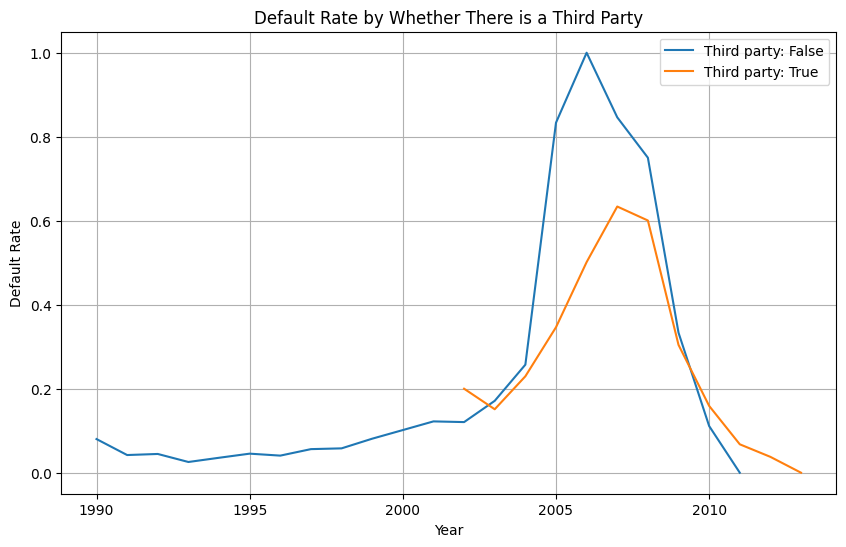

In [ ]:
plt.figure(figsize=(10,6))
for i, j in df.groupby(['Is ThirdParty']):
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
  plt.plot(temp['ApprovalFiscalYear'], temp['Default'], label = "Third party: " + str(bool(int(i))))
plt.grid()
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.title("Default Rate by Whether There is a Third Party")
plt.legend()
plt.show()

<ipython-input-9-831af65f62c0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_60 = df.loc[df['TermInMonths'] <= 60].groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-9-831af65f62c0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_120 = df.loc[(df['TermInMonths'] > 60) & (df['TermInMonths'] <= 120)].groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-9-831af65f62c0>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whi

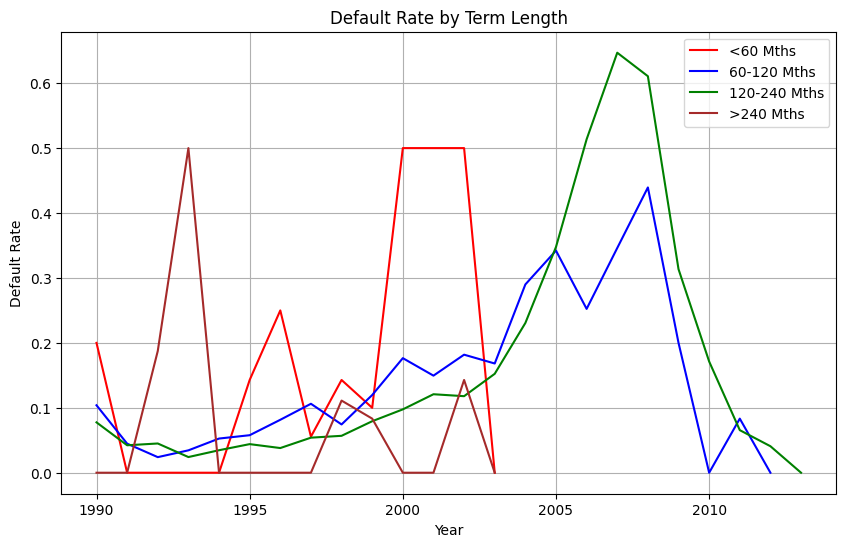

In [ ]:
df_60 = df.loc[df['TermInMonths'] <= 60].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_120 = df.loc[(df['TermInMonths'] > 60) & (df['TermInMonths'] <= 120)].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_240 = df.loc[(df['TermInMonths'] > 120) & (df['TermInMonths'] <= 240)].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_ab240 = df.loc[df['TermInMonths'] > 240].groupby(['ApprovalFiscalYear']).mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(df_60['ApprovalFiscalYear'], df_60['Default'], label = "<60 Mths", color = 'red')
plt.plot(df_120['ApprovalFiscalYear'], df_120['Default'], label = "60-120 Mths", color = 'blue')
plt.plot(df_240['ApprovalFiscalYear'], df_240['Default'], label = "120-240 Mths", color = 'green')
plt.plot(df_ab240['ApprovalFiscalYear'], df_ab240['Default'], label = ">240 Mths", color = 'brown')
plt.grid()
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.title("Default Rate by Term Length")
plt.legend()
plt.show()

<ipython-input-10-db0b993ab407>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_BorrUnemp4_5 = df.loc[df['BorrState Unemployment'] <= 4.5].groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-10-db0b993ab407>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_BorrUnemp6 = df.loc[(df['BorrState Unemployment'] > 4.5) & (df['BorrState Unemployment'] <= 6)].groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-10-db0b993ab407>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Eith

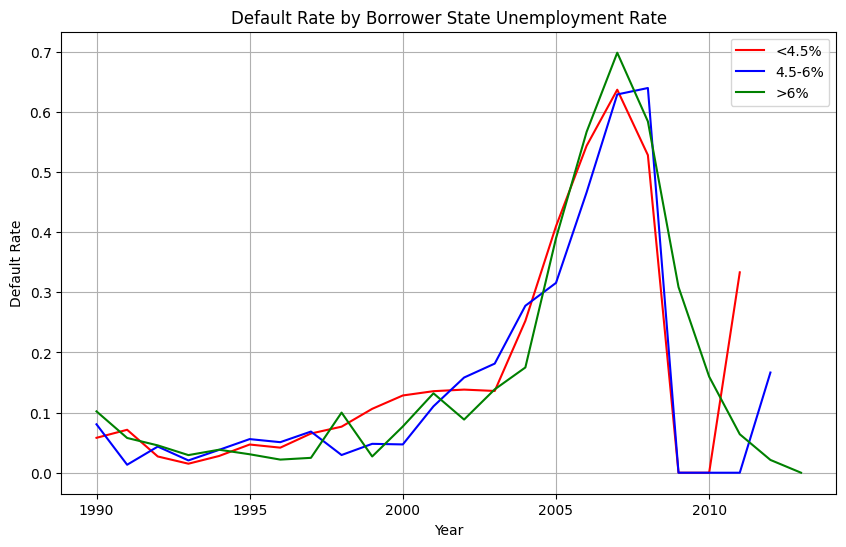

In [ ]:
df_BorrUnemp4_5 = df.loc[df['BorrState Unemployment'] <= 4.5].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_BorrUnemp6 = df.loc[(df['BorrState Unemployment'] > 4.5) & (df['BorrState Unemployment'] <= 6)].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_BorrUnempAbv6 = df.loc[df['BorrState Unemployment'] > 6].groupby(['ApprovalFiscalYear']).mean().reset_index()
plt.figure(figsize=(10,6))
plt.plot(df_BorrUnemp4_5['ApprovalFiscalYear'], df_BorrUnemp4_5['Default'], label = "<4.5%", color = 'red')
plt.plot(df_BorrUnemp6['ApprovalFiscalYear'], df_BorrUnemp6['Default'], label = "4.5-6%", color = 'blue')
plt.plot(df_BorrUnempAbv6['ApprovalFiscalYear'], df_BorrUnempAbv6['Default'], label = ">6%", color = 'green')

plt.grid()
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.title("Default Rate by Borrower State Unemployment Rate")
plt.legend()
plt.show()

<ipython-input-11-96076046edfd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ProjUnemp4_5 = df.loc[df['ProjectState Unemployment'] <= 4.5].groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-11-96076046edfd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ProjUnemp6 = df.loc[(df['ProjectState Unemployment'] > 4.5) & (df['BorrState Unemployment'] <= 6)].groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-11-96076046edfd>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False

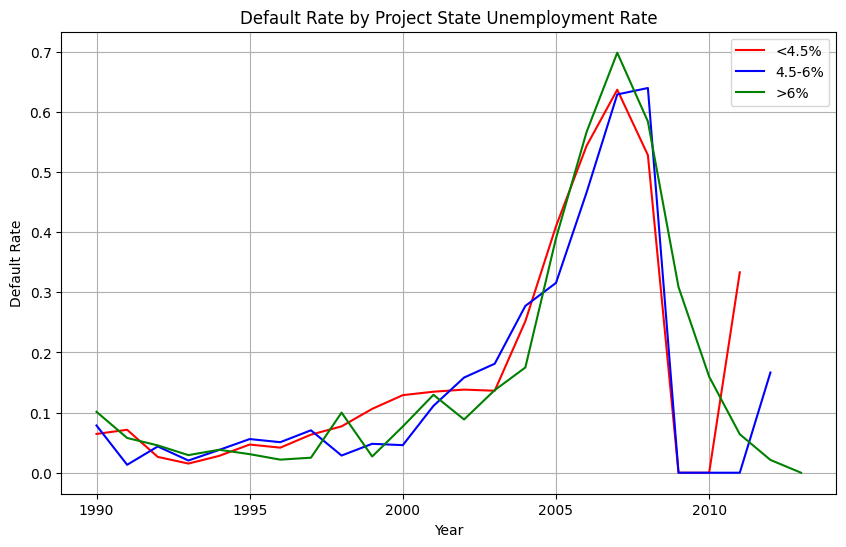

In [ ]:
df_ProjUnemp4_5 = df.loc[df['ProjectState Unemployment'] <= 4.5].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_ProjUnemp6 = df.loc[(df['ProjectState Unemployment'] > 4.5) & (df['BorrState Unemployment'] <= 6)].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_ProjUnempAbv6 = df.loc[df['ProjectState Unemployment'] > 6].groupby(['ApprovalFiscalYear']).mean().reset_index()
plt.figure(figsize=(10,6))
plt.plot(df_ProjUnemp4_5['ApprovalFiscalYear'], df_ProjUnemp4_5['Default'], label = "<4.5%", color = 'red')
plt.plot(df_ProjUnemp6['ApprovalFiscalYear'], df_ProjUnemp6['Default'], label = "4.5-6%", color = 'blue')
plt.plot(df_ProjUnempAbv6['ApprovalFiscalYear'], df_ProjUnempAbv6['Default'], label = ">6%", color = 'green')

plt.grid()
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.title("Default Rate by Project State Unemployment Rate")
plt.legend()
plt.show()

[(0.0, 20.0)]

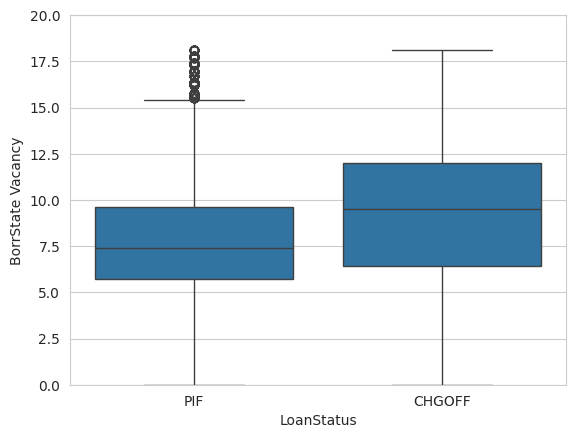

In [ ]:
sns.set_style("whitegrid")
ax = sns.boxplot(x=df["LoanStatus"], y=df['BorrState Vacancy'])
ax.set(ylim=(0, 20))

In [ ]:
PIF_VAC = np.array(df[df["LoanStatus"] == "PIF"]["BorrState Vacancy"])
CHGOFF_VAC = np.array(df[df["LoanStatus"] == "CHGOFF"]["BorrState Vacancy"])
print(pg.ttest(PIF_VAC, CHGOFF_VAC,correction=True))

                T          dof alternative          p-val          CI95%  \
T-test -37.826972  9404.050903   two-sided  1.341246e-291  [-1.66, -1.5]   

         cohen-d       BF10  power  
T-test  0.539403  5.62e+303    1.0  


[(0.0, 10.0)]

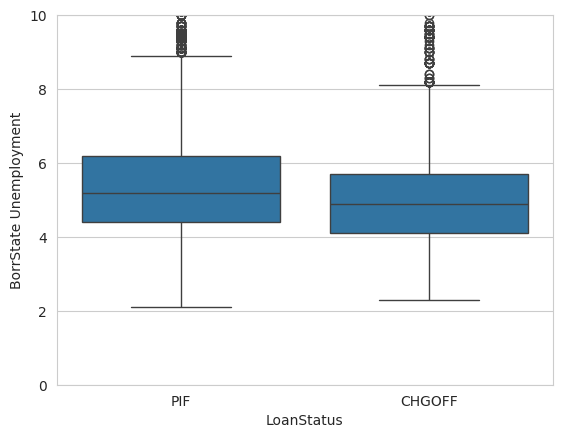

In [ ]:
sns.set_style("whitegrid")
ax = sns.boxplot(x=df["LoanStatus"], y=df['BorrState Unemployment'])
ax.set(ylim=(0, 10))

In [ ]:
PIF_EMP = np.array(df[df["LoanStatus"] == "PIF"]["BorrState Unemployment"])
CHGOFF_EMP = np.array(df[df["LoanStatus"] == "CHGOFF"]["BorrState Unemployment"])
print(pg.ttest(PIF_EMP, CHGOFF_EMP,correction=True))

                T           dof alternative         p-val         CI95%  \
T-test  14.415797  10655.910775   two-sided  1.130111e-46  [0.25, 0.33]   

         cohen-d       BF10  power  
T-test  0.178231  1.428e+43    1.0  


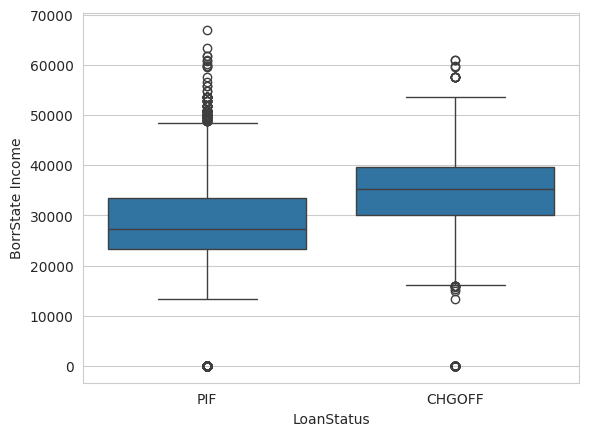

In [ ]:
sns.set_style("whitegrid")
ax = sns.boxplot(x=df["LoanStatus"], y=df['BorrState Income'])


In [ ]:
PIF_INC = np.array(df[df["LoanStatus"] == "PIF"]["BorrState Income"])
CHGOFF_INC = np.array(df[df["LoanStatus"] == "CHGOFF"]["BorrState Income"])
print(pg.ttest(PIF_INC, CHGOFF_INC,correction=True))

                T          dof alternative  p-val                 CI95%  \
T-test -62.093596  9729.607275   two-sided    0.0  [-6221.96, -5841.14]   

         cohen-d BF10  power  
T-test  0.847558  inf    1.0  


/usr/local/lib/python3.10/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
